![](https://healthmatters.nyp.org/wp-content/uploads/2020/01/heart-health-tips-article-animation-1200x500.gif)

# Table of Content
<hr style="height: 5px">

# [1. WorkFlow](#wf)

# [2. What is Logistic Regression](#lg)

# [3. Importing Library](#ib)

# [4. Loading Dataset](#ld)

# [5. Preprocing Dataset](#pd)

# [6. Preparing Dataset](#ppd)

# [7. Visualization of Training Data](#vt)

# [8. Model Building](#md)

# [9. Model Evaluation](#me)

# [10. Building Predictive System](#bp)

# [11. Conclusion](#c)
<hr style="height: 5px">

<a name='wf'></a>
 # 1. Work Flow

### Heart Data --->  Data Preprocessing ---> Train Test Split ---> Model Fiting ---> Prediction

<a name='lg'></a>
# 2. What is Logistic Regression?

### Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable.
### It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.
### Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
### In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).
### The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.
### Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.

### Here is quick comparision between Linear Regreesion  and Logistic Regression


 </img>![Logistic%20Regression.jpeg](attachment:Logistic%20Regression.jpeg)

[Best Article to understand Logistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)

<a name='ib'></a>
# Importing Library

In [ ]:
import pandas as pd  #Pandas is used to analyze data
import numpy as np   #This library contains a large number of mathematical, algebraic, and transformation functions
import matplotlib.pyplot as plt   # Used for Visualization of data
import seaborn as sns     #Seaborn is a Python data visualization library based on matplotlib
from sklearn.model_selection import train_test_split  # Used for splitting data into train data and test data
from sklearn.linear_model import LogisticRegression   # Importing Logistic Regression model
from sklearn.metrics import accuracy_score # To Calculate Accuracy classification score
#matplotlib inline sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

<a name='ld'></a>
#  Loading dataset

About DataSet

There are 13 attributes:

1. Age: Age in years.
2. Sex: Gender (1 = Male, 0 = Female)
3. ChestPain: Chest Pain type
 - 1: typical angina (all criteria present)
 - 2: atypical angina (two of three criteria satisfied)
 - 3: non-anginal pain (less than one criteria satisfied)
 - 4: asymptomatic (none of the criteria are satisfied)
4. Restbps: Resting Blood pressure (in mmHg, upon admission to the hospital)
5. Chol: serum cholesterol in mg/dL
6. Fbs: fasting blood sugar > 120 mg/dL (likely to be diabetic) 1 = true; 0 = false
7. RestECG: Resting electrocardiogram results
 - Value 0: normal
 - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. MaxHR: Greatest number of beats per minute your heart can possibly reach during all-out strenuous exercise.

9. Exang: exercise induced angina (1 = yes; 0 = no)

10. Oldpeak: ST depression induced by exercise relative to rest (in mm, achieved by subtracting the lowest ST segment points during exercise and rest)

11. Slope: the slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia
 - Value 1: upsloping
 - Value 2: flat
 - Value 3: downsloping

12. Ca: number of major vessels (0-3) colored by fluoroscopy. Major cardial vessels are as goes: aorta, superior vena cava, inferior vena cava, pulmonary artery (oxygen-poor blood --> lungs), pulmonary veins (oxygen-rich blood --> heart), and coronary arteries (supplies blood to heart tissue).

13. AHD:
 - 0 = normal
 - 1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest)
 - 2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test)

14. AHD:
 - 0 = no disease
 - 1 = disease

In [ ]:
# loading dataset which is in csv format using pd.read_csv(filename_with_extension)

df=pd.read_csv('../input/heart-disease/heart_disease.csv.txt')

In [ ]:
# Printing number of rows and column using shape

df.shape

(303, 14)

In [ ]:
#Printing First 5 rows of the dataset using head()

df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
#Printing Last 5 rows of the dataset using tail()

df.tail()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes
303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [ ]:
# Getting more Information of dataset using info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


<a name='pd'></a>
# Preprocessing of Dataset

### 1. Dealing with Missing Value
### 2.Converting cateogerical value to numeric value

In [ ]:
# Checking for Missing Value in whole dataset using
# isnull(): Returns a Boolean value that indicates whether an expression contains no valid data (Null)

df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [ ]:
# AS we can see we have 2 colimn which have missing value (Ca and Thal)
# Dealing with Missing Value: we will replace missing value with 0

In [ ]:
#Replcaing missing value in colimn Ca with 0 using fillna():
#fiilna():

df['Ca'].fillna(0,inplace=True)

In [ ]:
# Checkling if Ca is having null value since we fill null value it should return 0

df['Ca'].isnull().sum()

0

In [ ]:
# Checking for Missing Value again if any leftover

df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
AHD          0
dtype: int64

###### Note we still have one column Thal having missing value, we will deal with in a bit

In [ ]:
# Converting Careogorical data to numeric data

In [ ]:
# Columns that needs to be changed
# 1. ChestPain
# 2. Thal
# 3. AHD

In [ ]:
# Printing ChestPain column without processing

df['ChestPain']

1           typical
2      asymptomatic
3      asymptomatic
4        nonanginal
5        nontypical
           ...     
299         typical
300    asymptomatic
301    asymptomatic
302      nontypical
303      nonanginal
Name: ChestPain, Length: 303, dtype: object

In [ ]:
#value_count():return a Series containing counts of unique values

df['ChestPain'].value_counts()

asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64

In [ ]:
# replacing the value using replace()

df['ChestPain'].replace(['typical','nontypical','nonanginal','asymptomatic'],[1,2,3,4],inplace=True)

In [ ]:
# Printing to check whether value have changed or not

df['ChestPain']

1      1
2      4
3      4
4      3
5      2
      ..
299    1
300    4
301    4
302    2
303    3
Name: ChestPain, Length: 303, dtype: int64

In [ ]:
#verifying the values are replaced properly using value_count()

df['ChestPain'].value_counts()

4    144
3     86
2     50
1     23
Name: ChestPain, dtype: int64

In [ ]:
# Replacing value using replace()

df['Thal'].replace(['normal','fixed','reversable'],[1,2,3],inplace=True)

In [ ]:
#verifying the values are replaced properly using value_count()

df['Thal'].value_counts()

1.0    166
3.0    117
2.0     18
Name: Thal, dtype: int64

In [ ]:
166+117+18

301

#### As we  have 303 rows we have 2 rows missing

#### We now deal with missing value

In [ ]:
# We are filling 0 in place of null value

df['Thal'].fillna(0,inplace=True)

In [ ]:
# Verifying the values are replaced properly using value_count()

df['Thal'].value_counts()

1.0    166
3.0    117
2.0     18
0.0      2
Name: Thal, dtype: int64

In [ ]:
#Replacing the value using replace()

df['AHD'].replace(['No','Yes'],[0,1],inplace=True)

In [ ]:
# Checking if changes are done

df['AHD']

1      0
2      1
3      1
4      0
5      0
      ..
299    1
300    1
301    1
302    1
303    0
Name: AHD, Length: 303, dtype: int64

In [ ]:
# Verifying the values are replaced properly using value_count()

df['AHD'].value_counts()

0    164
1    139
Name: AHD, dtype: int64

In [ ]:
164+139

303

In [ ]:
#Final look at the dataset

df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,2.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,1.0,1
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,3.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,1.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,3.0,1
300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,3.0,1
301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,3.0,1
302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1.0,1


# EDA

In [ ]:
# Plotting the histogram of the data passed and set title will be title passed to the function
def hist(col,title):

    plt.figure(figsize = (10,8))

    ax = sns.histplot(col,kde=False);

    values = np.array([patch.get_height() for patch in ax.patches])

    #normalizing the values to get a range of colours
    norm = plt.Normalize(values.min(), values.max())

    #range of colours from colourmap-rainbow
    colors = plt.cm.rainbow(norm(values))

    #set colour for each patch
    for patch, color in zip(ax.patches, colors):
        patch.set_color(color)

    plt.title(title, size = 20)

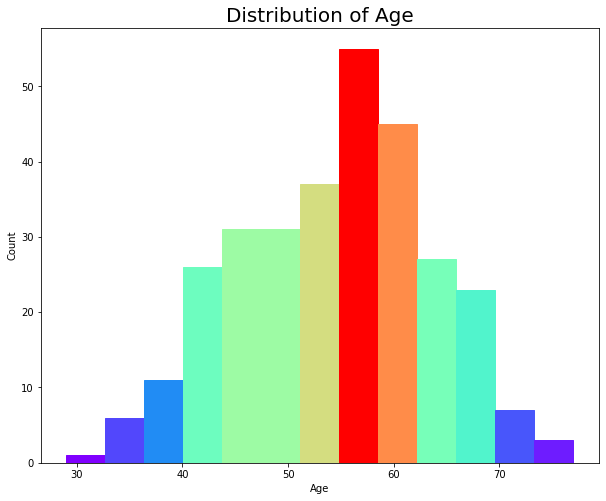

In [ ]:
hist(df['Age'],'Distribution of Age')

In [ ]:
import plotly.graph_objects as go
cp = df.ChestPain.value_counts()

fig = go.Figure([go.Bar(x=cp.index, y=cp.values,text=cp.values,
            textposition='auto')])
fig.update_layout(title_text='Distribution of the ChestPain')
fig.show()

In [ ]:
# Plotting the Pie Chart of Gender

import plotly.express as px
s=df.Sex.value_counts()
name = ["Male","Female"]
fig = px.pie(df, values=s.values ,names=name)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

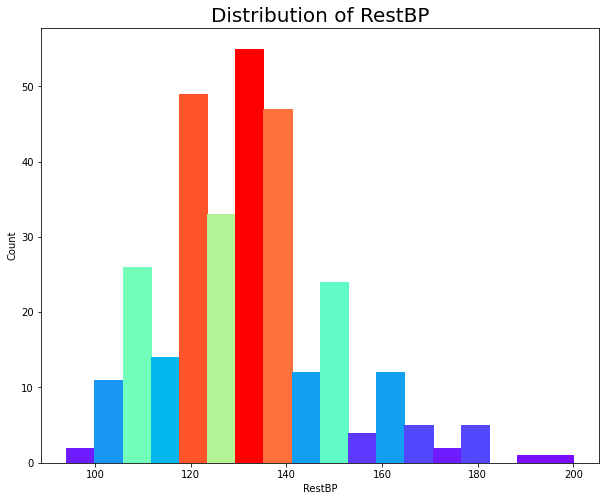

In [ ]:
# Plotting the histogram of RestBP

hist(df['RestBP'],'Distribution of RestBP')

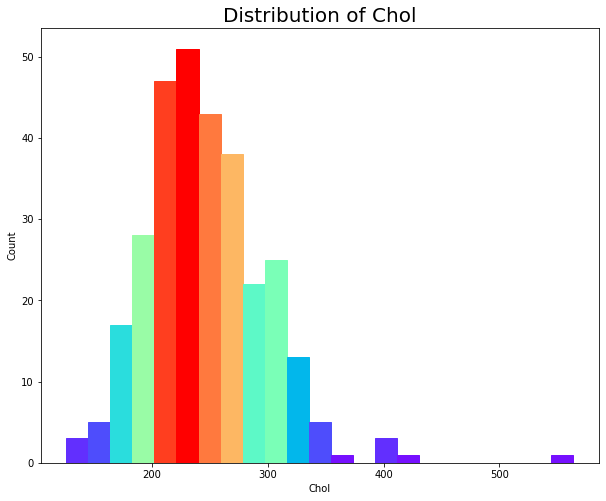

In [ ]:
# Plotting the histogram of Chol

hist(df['Chol'],'Distribution of Chol')

In [ ]:
# Fasting Blood Sugar (FBS or Fasting Glucose)
# Plotting the Pie Chart of Fbs

import plotly.express as px
s=df.Fbs.value_counts()
fig = px.pie(df, values=s.values ,names=s.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

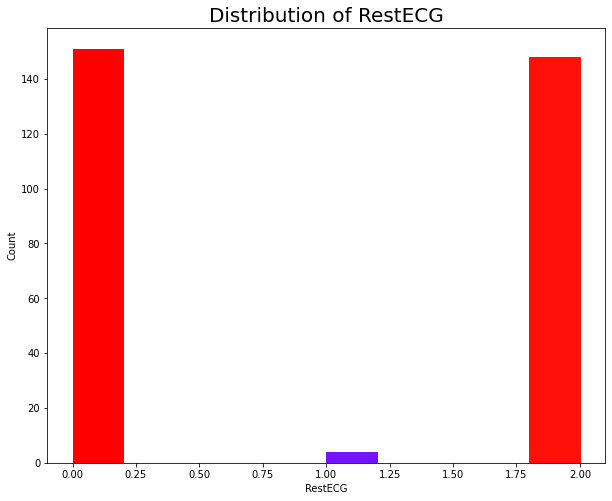

In [ ]:
# Plotting the histogram of RestECG

hist(df['RestECG'],'Distribution of RestECG')

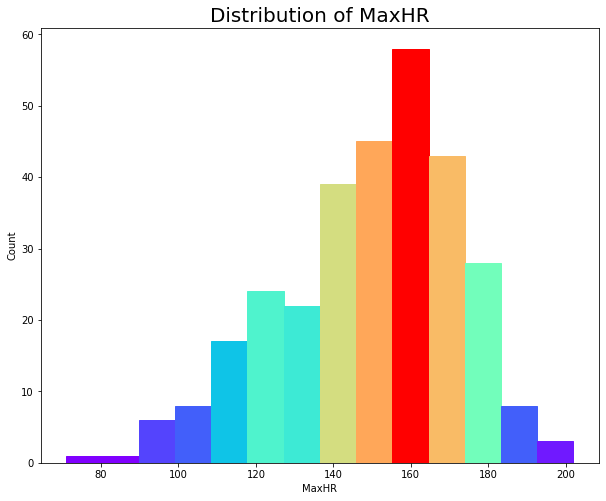

In [ ]:
# Plotting the histogram of MaxHR

hist(df['MaxHR'],'Distribution of MaxHR')

In [ ]:
# Plotting the Pie Chart of ExAng

import plotly.express as px
s=df.ExAng.value_counts()
fig = px.pie(df, values=s.values ,names=s.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

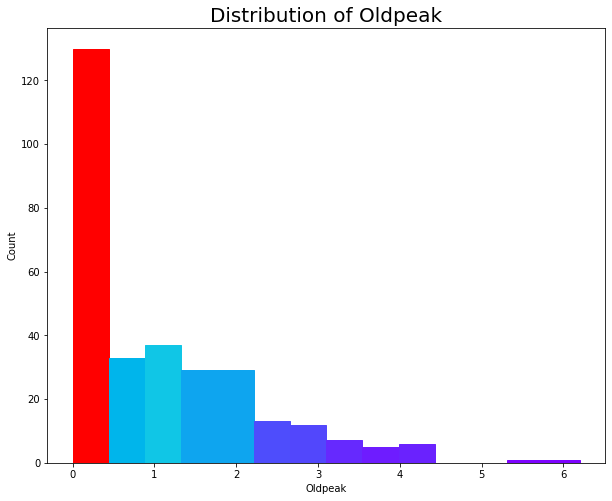

In [ ]:
# Plotting the histogram of Oldpeak

hist(df['Oldpeak'],'Distribution of Oldpeak')

In [ ]:
# Plotting the Pie Chart of Slope

import plotly.express as px
s=df.Slope.value_counts()
fig = px.pie(df, values=s.values ,names=s.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
# Plotting the Pie Chart of Ca

import plotly.express as px
s=df.Ca.value_counts()
fig = px.pie(df, values=s.values ,names=s.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

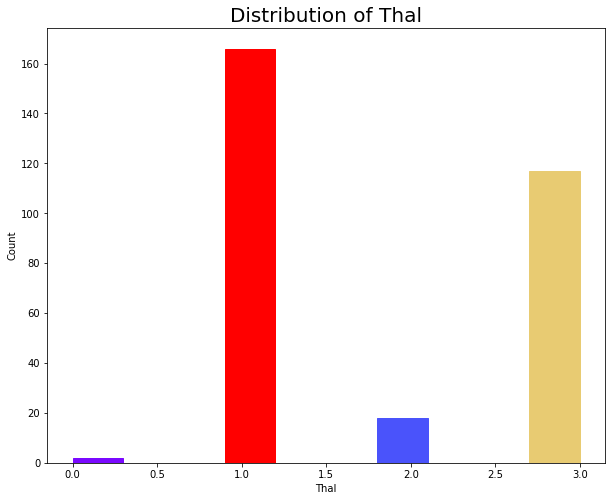

In [ ]:
# Plotting the histogram of Thal

hist(df['Thal'],'Distribution of Thal')

In [ ]:
# Plotting the Pie Chart of AHD

import plotly.express as px
s=df.AHD.value_counts()
name=["Flase","True"]
fig = px.pie(df, values=s.values ,names=name)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<a name='ppd'></a>
#  Preparing Data for Classification

In [ ]:
# We are removing AHD which is target and store it in other varibale

X=df.drop(columns='AHD',axis=1)

y=df['AHD']

In [ ]:
# Printing X where we have removed traget variable

X

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,2.0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,1.0
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,3.0
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,1.0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,3.0
300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,3.0
301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,3.0
302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1.0


In [ ]:
# Printing Y which as only traget variable

y

1      0
2      1
3      1
4      0
5      0
      ..
299    1
300    1
301    1
302    1
303    0
Name: AHD, Length: 303, dtype: int64

In [ ]:
# Spliting data into train data and test data

X_train,X_test,y_train,y_test=train=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
# Printing the size of X training dataset

X_train.shape

(242, 13)

In [ ]:
# Printing the size of X testing dataset

X_test.shape

(61, 13)

In [ ]:
# Printing the size of Y training dataset

y_train.shape

(242,)

In [ ]:
# Printing the size of Y testing dataset

y_test.shape

(61,)

<a name='vt'></a>
# Visualizing Training Data

### Here are just plotting histogram of Training data (**Note:** we will not use testing data)

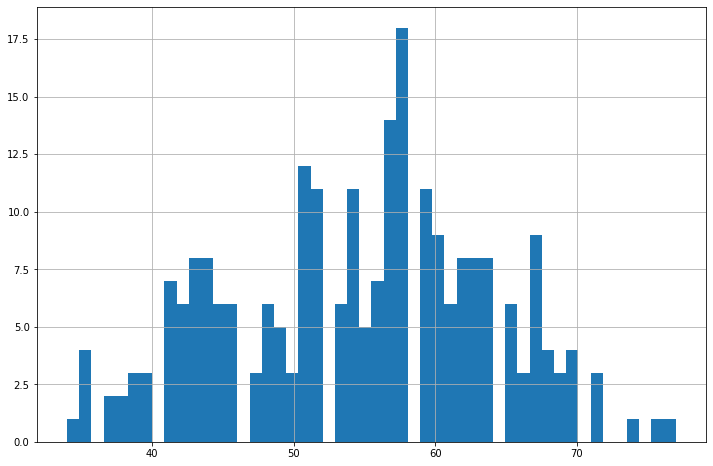

In [ ]:
# We are just plotting histogram of Age

X_train['Age'].hist(figsize=(12,8),bins=50)
plt.show()

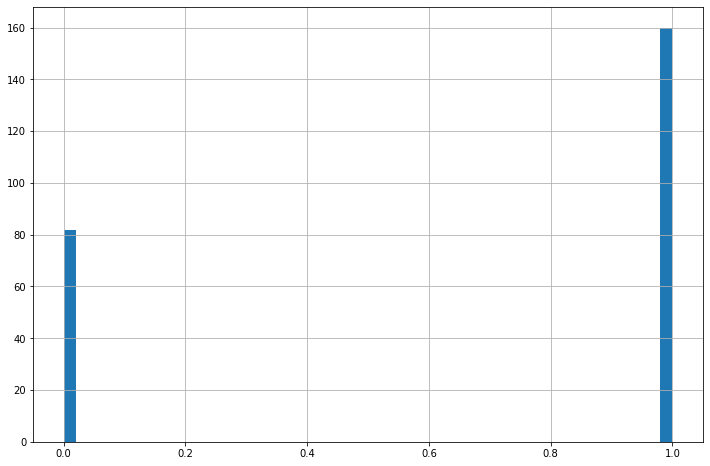

In [ ]:
# We are just plotting histogram of Sex

X_train['Sex'].hist(figsize=(12,8),bins=50)
plt.show()

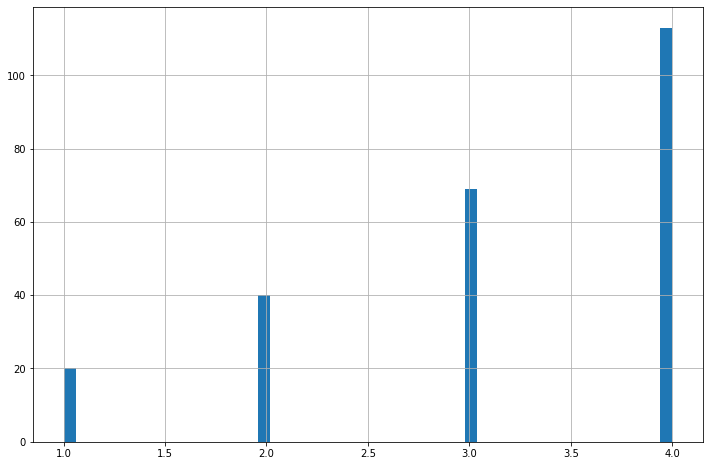

In [ ]:
# We are just plotting histogram of ChestPain

X_train['ChestPain'].hist(figsize=(12,8),bins=50)
plt.show()

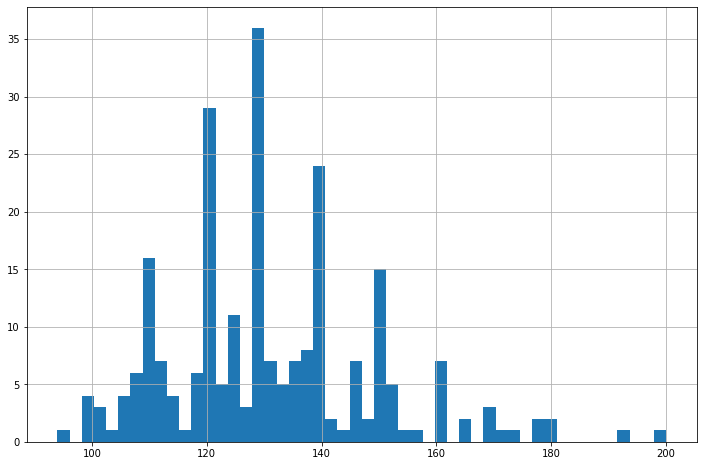

In [ ]:
# We are just plotting histogram of RestBP

X_train['RestBP'].hist(figsize=(12,8),bins=50)
plt.show()

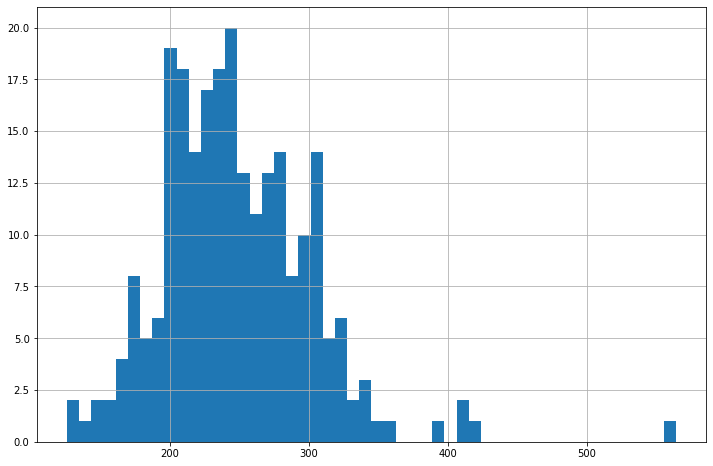

In [ ]:
# We are just plotting histogram of Chol

X_train['Chol'].hist(figsize=(12,8),bins=50)
plt.show()

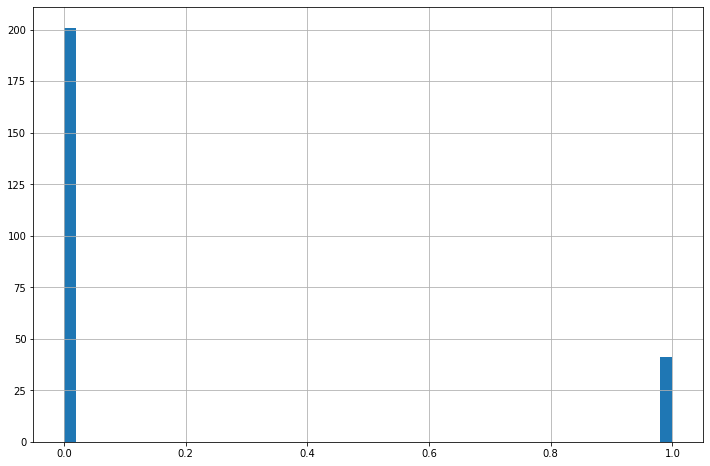

In [ ]:
# We are just plotting histogram of Fbs

X_train['Fbs'].hist(figsize=(12,8),bins=50)
plt.show()

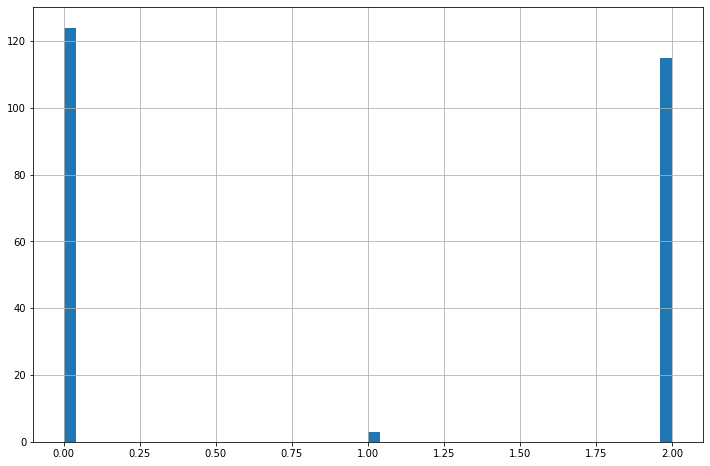

In [ ]:
# We are just plotting histogram of RestECG

X_train['RestECG'].hist(figsize=(12,8),bins=50)
plt.show()

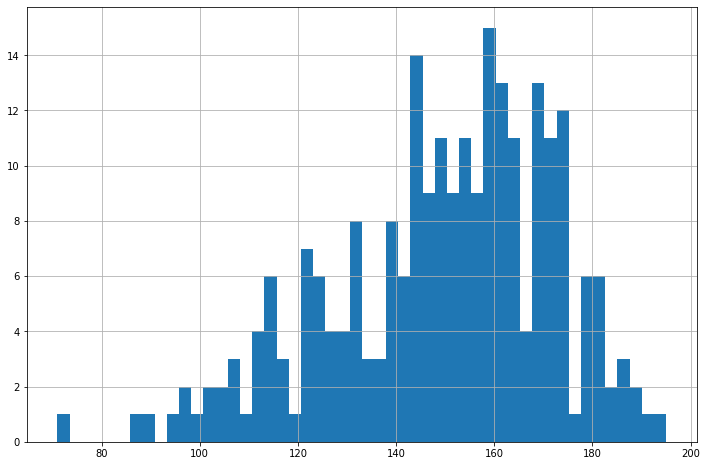

In [ ]:
# We are just plotting histogram of MaxHR

X_train['MaxHR'].hist(figsize=(12,8),bins=50)
plt.show()

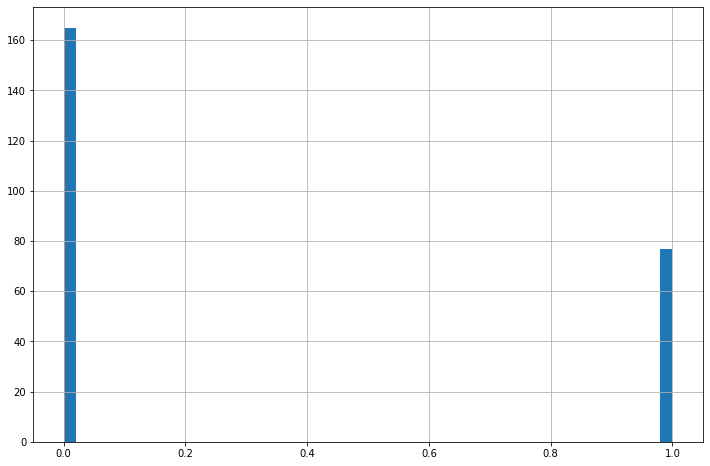

In [ ]:
# We are just plotting histogram of ExAng

X_train['ExAng'].hist(figsize=(12,8),bins=50)
plt.show()

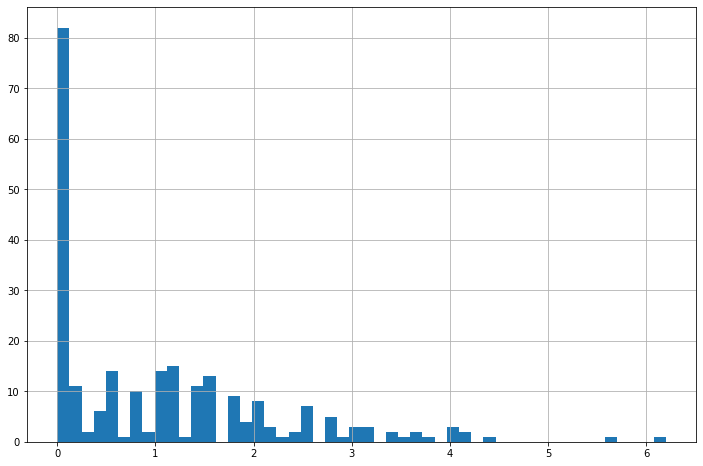

In [ ]:
# We are just plotting histogram of Oldpeak

X_train['Oldpeak'].hist(figsize=(12,8),bins=50)
plt.show()

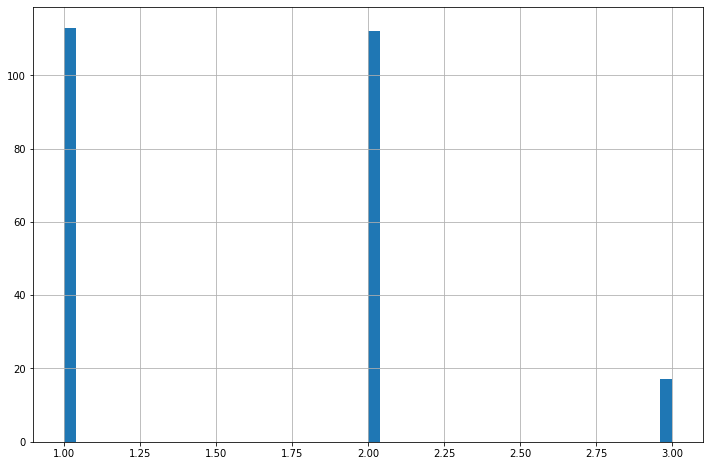

In [ ]:
# We are just plotting histogram of Slope

X_train['Slope'].hist(figsize=(12,8),bins=50)
plt.show()

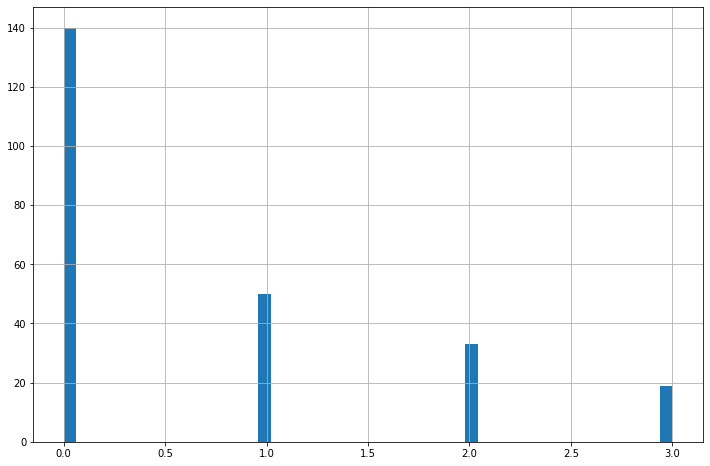

In [ ]:
# We are just plotting histogram of Ca

X_train['Ca'].hist(figsize=(12,8),bins=50)
plt.show()

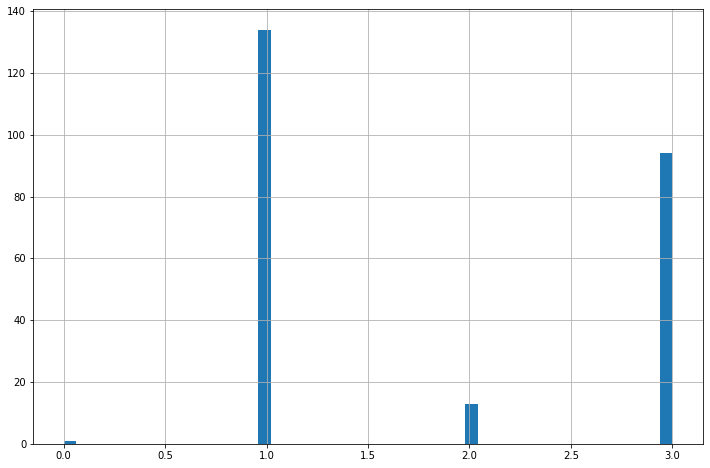

In [ ]:
# We are just plotting histogram of Thal

X_train['Thal'].hist(figsize=(12,8),bins=50)
plt.show()

### Note we have not added AHD because its out targat variable

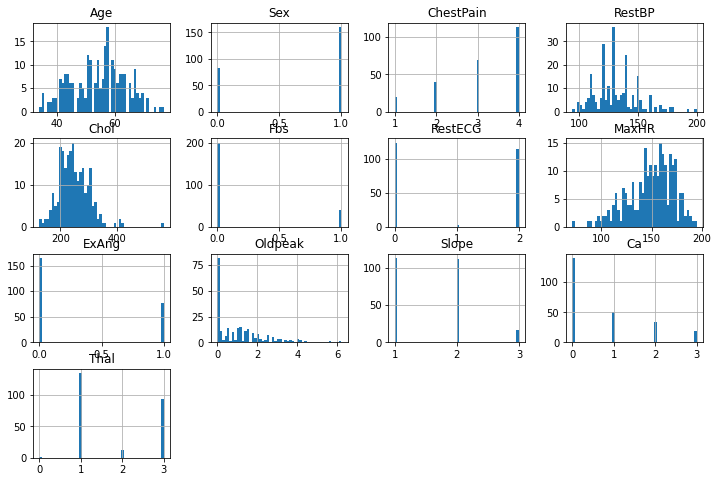

In [ ]:
# Instead of Writing all the histogram seprately we can use

X_train.hist(figsize=(12,8),bins=50)
plt.show()

<a name='md'></a>
# Model Building

In [ ]:
# Creating instance of LogisticRegression

model=LogisticRegression(solver='liblinear')

In [ ]:
# Fitting the data in the logistic Regression (Ignore Waring)

model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'logisticRegressionModel.joblib')

['logisticRegressionModel.joblib']

<a name='me'></a>
# Model Evaluation

In [ ]:
# As we Created out model Lets test it
#We will fing Accuracy on training data

X_train_predict=model.predict(X_train)

training_data_acc=accuracy_score(X_train_predict,y_train)

print('acc score=',training_data_acc)


acc score= 0.859504132231405


In [ ]:
# Accuracy on testing data

X_test_predict=model.predict(X_test)

testing_data_acc=accuracy_score(X_test_predict,y_test)

print('acc score=',testing_data_acc)

acc score= 0.8360655737704918


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(X_test_predict,y_test)

array([[29,  6],
       [ 4, 22]])

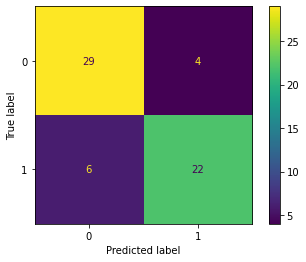

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)
plt.show()

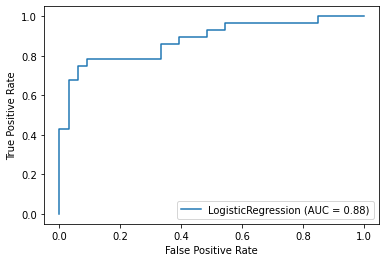

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(X_test_predict,y_test))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.79      0.85      0.81        26

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



<a name='bp'></a>
# Building Predictive System (optional)

In [ ]:
# Here we take one custom or from testing set input and test whether the person has heart disease or not

#input_data=(41,0,2,130,204,0,2,172,0,1.4,1,0.0,1.0)

input_data=(68,1,4,144,193,1,0,141,0,3.4,2,2.0,3.0)


#changing input tuple to numpy array

data=np.asarray(input_data)


#reshaping the numpy array as we are predicting for only  on instance

new_data=data.reshape(1,-1)


# predicting on new data

new_predict=model.predict(new_data)

# Printing predicting value

#print(new_predict)


if(new_predict[0]==0):

    print('The Person does not have Heart Disease')

else:

    print("The Person have Heart Disease")


The Person have Heart Disease


<a name='c'></a>
# Conclusion

### This Algorithm performed well,

### Here we had only 303 rows, it very less data to train a model on  then too our model performed uite well we achieved above 85% accuracy on trainig data and 83% in testing data without getting overfitted

### Logistic regression provides a useful means for modelling the dependence of a binary response variable on one or more explanatory variables, where the latter can be either categorical or continuous. The fit of the resulting model can be assessed using a number of methods.

### We created custom input and tested it, in Building Predictive System section it also worked properly.

### Thats it we are done with Logistic Regression Algorithm.....!!!